# 1 Report on Predicting Boston-area Precipitation
## 1.1 Executive Summary

### Index of files
1.1 Executive Summary
1.2
2.1 Formatting Raw Data
2.2 Supplementing station data
2.3 Selecting Single Stations
3.1 Descriptive Statistics
3.2 

### Set Up Experience

In [10]:
import pandas as pd 

descriptive_statistics = pd.read_csv(r"C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Data_Products/station_interest_desc_stats.csv")


### Introduction

As climate change impacts the frequency and intensity of rainfall events, predicting precipitation patterns will become even more important in preparing for and mitigating these changes. Whether preparing for floods or droughts, observing long-term patterns (the climate) allow us to predict specifically when and where we should expect precipitation or clear skies (the weather). Sufficiently long records of weather station data allow us to examine patterns, model cyclical behavior, and test predictions for specific climate measurements.

Having lived in the Boston area for nearly five years, it seems like there are fewer big rainstorms every summer and less snow on the ground each winter. I want to investigate monthly precipitation patterns around the Boston region to understand and predict when the majority of monthly rain-/snow-fall is occurring. Here, I prepare precipitation datasets from three Boston-area weather stations (section 2). I calculate descriptive statistics and produce predictive preciptitation models for each station (section 3).

### Methods

#### Data sources
The 'Precipitation Database Data 2019' dataset is available from the __[Massachusetts Department of Conservation & Recreation's Office of Water Resources](https://www.mass.gov/info-details/precipitation-data)__. This dataset is comprised of observed monthly precipitation totals (in inches) for weather stations across Massachusetts. Here, snowfall is melted into equivalent inches of water and added to rainfall. GPS coordinates for stations are available upon request from the MA DCR.

#### Dataset preparatation
I separated the 'Precipitation Database Data 2019' dataset into three separate tables of preciptiation, station, and basin data. Then, I supplemented the station data table with record completeness data (each station) and gps coordinates (if available). I selected all stations with 30-year records between 1989 and 2019 and exported records from stations in Lynn (LYN614), Cohasset (COH726), and Weymouth (WEY738) (see 'Stations selected for precipitation modeling'). 

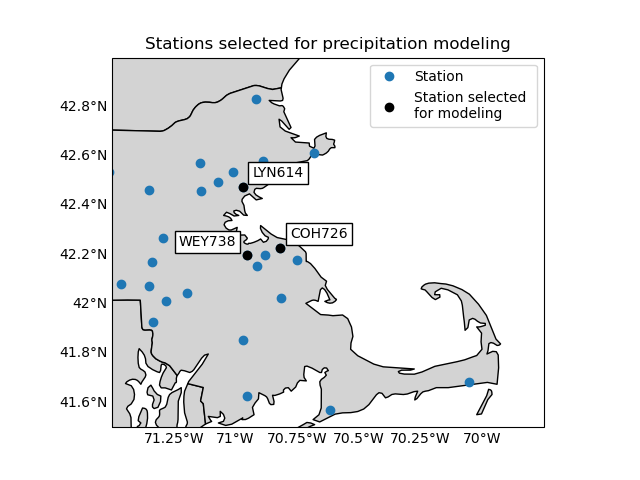

#### Descriptive Statistics
I calculated descriptive statistics for each station's record, including mean, median, mode, standard deviation, and quartiles. I also calculated skew and kurtosis and performed a Shapiro-Wilkes test of normality to assess the distribution of monthly rainfall independent of time. If the p-value of the test is less than 0.05, the distribution is significantly different from a normal/Gaussian distribtuion and has implications for some statistical methods. Additionally, I perform a non-parametric Mann-Whitney U test for each combination of stations to assess significant differences in mean.

#### Predictive Models


### Findings

The distribution of rainfall at each station is not normal; table 1 shows the p-values calculated for each station are much less than our chosen level of significance (alpha = 0.05). Mann-Whitney U tests indicate the mean monthly precipitation is significantly different in Cohasset and Lynn (statistic=63190.0, p-value=0.004) and Lynn and Weymouth (statistic=45339.5, p-value=0.016), but not between Cohasset and Weymouth (statistic=49502.5, p-value=0.729). Located north of the other stations, Lynn has the lowest mean monthly rainfall despite experiencing the most precipitation in a single month during this study period (Table 1). Lynn also has the greatest standard deviation and thus variability (Table 1). To the south, Cohasset and Weymouth received almost 0.5 inches more precipitation per median month and experience less variability as shown by their lower standard deviations (Table 1). 

In [16]:
print("Table 1. Descriptive statistics for select weather stations")
descriptive_statistics


Table 1. Descriptive statistics for select weather stations


,Statistics,COH726,LYN614,WEY738
0,Months Reported,327.000,342.000,298.000
1,Mean Precipitation,4.155,3.835,4.077
2,Standard Deviation,2.075,2.362,2.011
3,Minimum,0.110,0.170,0.630
4,25% Quartile,2.735,2.062,2.507
5,50% Quartile,3.900,3.350,3.805
6,75% Quartile,5.200,4.800,5.270
7,Maximum,13.850,15.500,11.270
8,Median,3.900,3.350,3.805
9,Mode,2.990,3.160,2.180


After normalizing by proportion of total values, the Weymouth precipitation distribution has a shorter right tale than the others and exhibites less compression, confirming what its lower skew and kurtosis values indicate (table 1, "Distribution of normalized monthly rainfall values"). The mean monthly rainfall at the Lynn station is significantly different from that at either Cohasset or Weymouth (Mann-Whitney U-test: Cohasset-Lynn: test-statistic = 63190.0, p-value = 0.004; Lynn-Weymouth: test-statistic = 45339.5, p-value = 0.016). However, the mean monthly rainfall at Cohasset isn't significantly different from Weymouth (Mann-Whitney U-test: Cohasset-Lynn: test-statistic = 49502.5, p-value = 0.729).

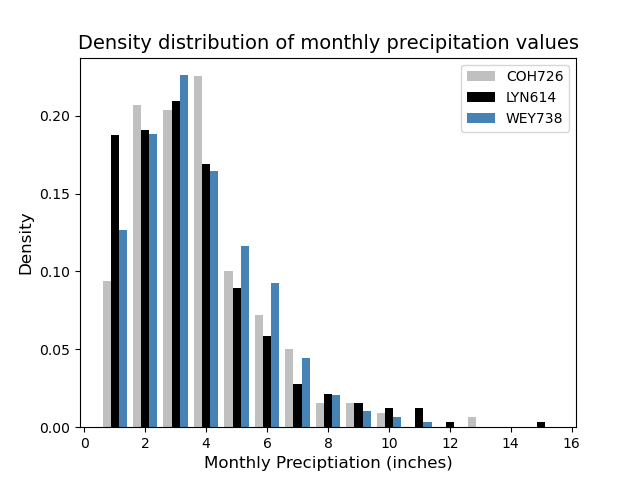


Examining the autocorrelation plots for each station shows there are significant positive lags in the Cohasset record at 3 and 17 months and a significant negative lag in the Weymouth record at 7 months.

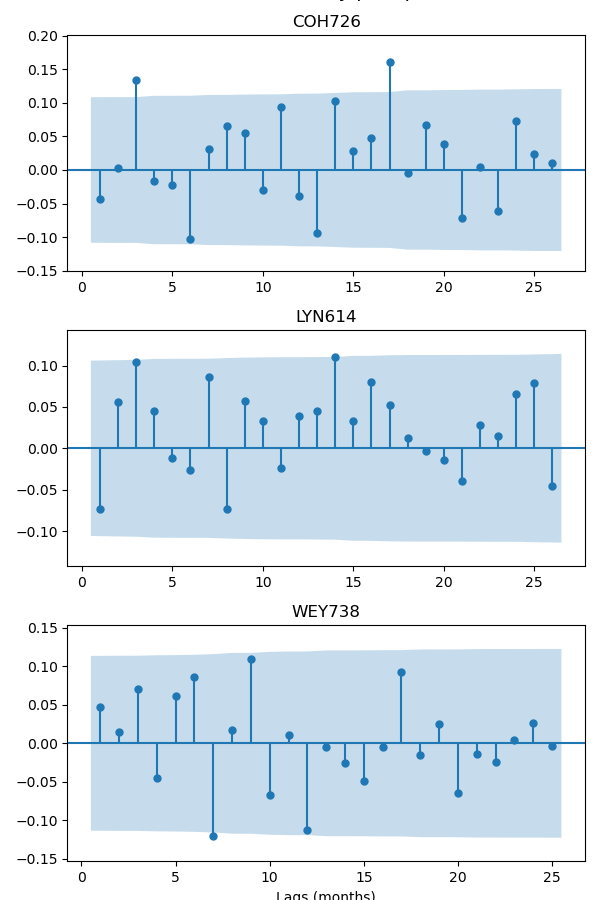
